## Eksplorasi Data

In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

# Atur style untuk visualisasi
plt.style.use('default')
sns.set_palette("husl")

print("Library berhasil diimport")

Library berhasil diimport


### 1. Nilai Minimum dan Maksimum dari Setiap Kolom

In [2]:
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Min & Max dalam satu tabel
min_vals = df.drop("species", axis=1).min()
max_vals = df.drop("species", axis=1).max()

summary = pd.DataFrame({
    "Minimum": min_vals,
    "Maksimum": max_vals
}).round(2)

print("\n--- Nilai Minimum & Maksimum Setiap Fitur ---")
display(summary)



--- Nilai Minimum & Maksimum Setiap Fitur ---


,Minimum,Maksimum
sepal length (cm),4.3,7.9
sepal width (cm),2.0,4.4
petal length (cm),1.0,6.9
petal width (cm),0.1,2.5


### 2. Rata - Rata dari Setiap Kolom

In [3]:
print("\n--- Rata-rata Setiap Kolom ---")
mean_all = df.drop("species", axis=1).mean().round(2).to_frame(name="Rata-rata")
display(mean_all)



--- Rata-rata Setiap Kolom ---


,Rata-rata
sepal length (cm),5.84
sepal width (cm),3.06
petal length (cm),3.76
petal width (cm),1.20


### 3. Rata-rata per Kelas (Species)

In [4]:
mean_per_class = df.groupby("species").mean().round(2)

print("\n--- Rata-rata per Kelas (Species) ---")
display(mean_per_class)



--- Rata-rata per Kelas (Species) ---


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.01,3.43,1.46,0.25
versicolor,5.94,2.77,4.26,1.33
virginica,6.59,2.97,5.55,2.03


### 4. Jumlah Setiap Kelas (Grafik Batang)

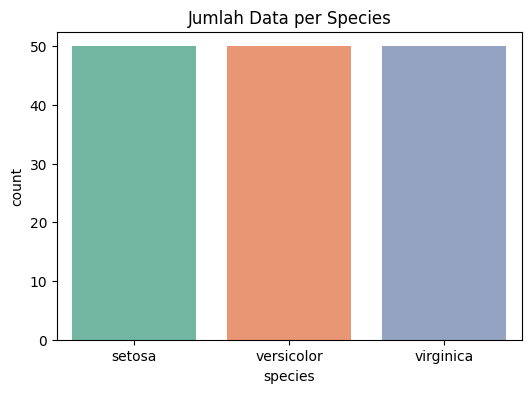

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x="species", data=df, palette="Set2")
plt.title("Jumlah Data per Species")
plt.show()

### 5. Visualisasi Tambahan: Perbandingan Rata-rata per Kolom

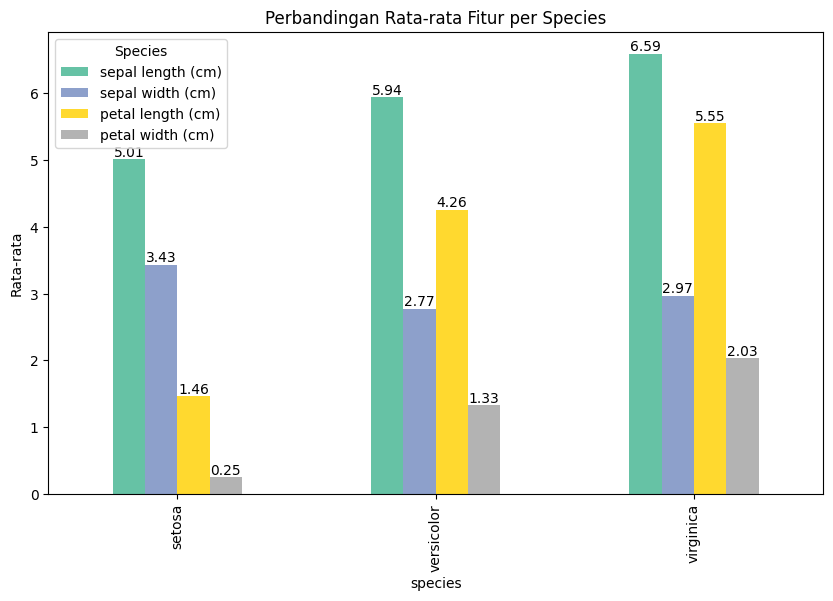

In [6]:
ax = mean_per_class.plot(kind="bar", figsize=(10,6), colormap="Set2")

plt.title("Perbandingan Rata-rata Fitur per Species")
plt.ylabel("Rata-rata")

# Tambahkan nilai di atas batang
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=10)

plt.legend(title="Species")
plt.show()


### 6. Heatmap Rata-rata per Kelas

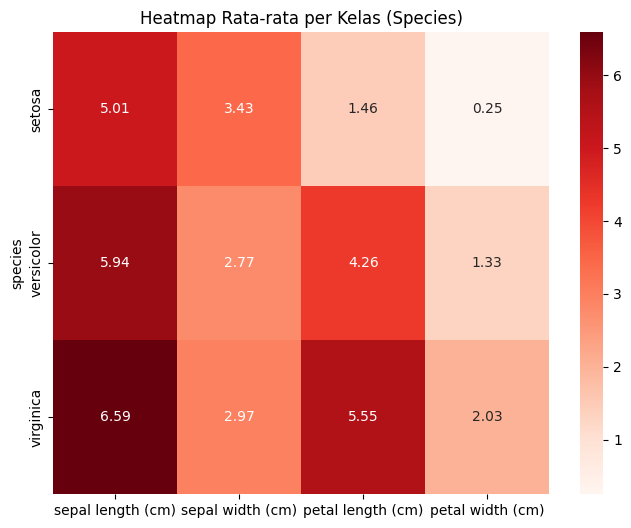

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(mean_per_class, annot=True, cmap="Reds", fmt=".2f")
plt.title("Heatmap Rata-rata per Kelas (Species)")
plt.show()


### 7. Ringkasan Hasil Eksplorasi

In [8]:
numeric_columns = df.select_dtypes(include="number").columns
class_counts = df["species"].value_counts()

print("RINGKASAN HASIL EKSPLORASI DATA IRIS")
print("="*50)
print(f"Total sampel: {len(df)}")
print(f"Jumlah fitur numerik: {len(numeric_columns)}")
print(f"Jumlah kelas: {df['species'].nunique()}")
print(f"Kelas: {', '.join(df['species'].unique())}")

print("\nDistribusi kelas:")
print((class_counts / len(df) * 100).round(1).astype(str) + " %")

print("\nRentang nilai setiap fitur:")
summary = df[numeric_columns].agg(["min","max"])
for col in numeric_columns:
    print(f"  {col}: {summary.loc['min',col]:.2f} - {summary.loc['max',col]:.2f} "
          f"(rentang: {(summary.loc['max',col]-summary.loc['min',col]):.2f})")


RINGKASAN HASIL EKSPLORASI DATA IRIS
Total sampel: 150
Jumlah fitur numerik: 4
Jumlah kelas: 3
Kelas: setosa, versicolor, virginica

Distribusi kelas:
species
setosa        33.3 %
versicolor    33.3 %
virginica     33.3 %
Name: count, dtype: object

Rentang nilai setiap fitur:
  sepal length (cm): 4.30 - 7.90 (rentang: 3.60)
  sepal width (cm): 2.00 - 4.40 (rentang: 2.40)
  petal length (cm): 1.00 - 6.90 (rentang: 5.90)
  petal width (cm): 0.10 - 2.50 (rentang: 2.40)
